In [122]:
import torch
import torch.nn as nn

In [123]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [124]:
t_un = t_u*0.1
n_samples = t_un.shape[0]
n_val = int(0.2 * n_samples)
perm_indices = torch.randperm(n_samples)
train_ind = perm_indices[:-n_val]
val_ind =perm_indices[-n_val:]
tu_train = t_un[train_ind].unsqueeze(1)
print(tu_train.shape)
tu_val = t_un[val_ind].unsqueeze(1)
print(tu_val)
tc_train = t_c[train_ind].unsqueeze(1)
print(tc_train)
tc_val = t_c[val_ind].unsqueeze(1)
print(tc_val)

torch.Size([9, 1])
tensor([[8.1900],
        [5.5900]])
tensor([[15.0000],
        [ 8.0000],
        [11.0000],
        [ 6.0000],
        [13.0000],
        [-4.0000],
        [21.0000],
        [ 0.5000],
        [ 3.0000]])
tensor([[28.],
        [14.]])


In [125]:
model = torch.nn.Linear(1,1)
model.parameters()


<generator object Module.parameters at 0x127701b60>

In [126]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.4369]], requires_grad=True),
 Parameter containing:
 tensor([-0.1647], requires_grad=True)]

In [127]:
a = model(torch.ones(4,1))
a

tensor([[-0.6015],
        [-0.6015],
        [-0.6015],
        [-0.6015]], grad_fn=<AddmmBackward0>)

In [128]:
loss = torch.nn.MSELoss()

In [129]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

In [130]:
def training_loop(tu_train, tc_train, tu_val, tc_val, model, loss, optimizer, epochs):
    for i in range(epochs):
        
        out = model(tu_train)
        loss_train = loss(out, tc_train)
        assert loss_train.requires_grad == True
        
        with torch.no_grad():
            out = model(tu_val)
            loss_val = loss(out, tc_val)
            assert loss_val.requires_grad == False # validate the requires_grad is false for this

        #clear out the grads
        optimizer.zero_grad()
        loss_train.backward()
        #take optim step
        optimizer.step()
        
        if(i <3 or i%500 ==0):
            print(f"Epoch {i}th train loss is {loss_train}, val loss is {loss_val}")

In [131]:
training_loop(tu_train, tc_train, tu_val, tc_val, model, loss, optimizer, 5000)

Epoch 0th train loss is 171.30953979492188, val loss is 641.695556640625
Epoch 1th train loss is 58.13636779785156, val loss is 278.28472900390625
Epoch 2th train loss is 31.88542366027832, val loss is 157.83193969726562
Epoch 500th train loss is 7.520978927612305, val loss is 28.122318267822266
Epoch 1000th train loss is 3.9119763374328613, val loss is 13.509254455566406
Epoch 1500th train loss is 3.127560615539551, val loss is 8.614120483398438
Epoch 2000th train loss is 2.95706844329834, val loss is 6.748780250549316
Epoch 2500th train loss is 2.9200103282928467, val loss is 5.969719409942627
Epoch 3000th train loss is 2.911956787109375, val loss is 5.6262078285217285
Epoch 3500th train loss is 2.9102067947387695, val loss is 5.470348834991455
Epoch 4000th train loss is 2.9098269939422607, val loss is 5.398623943328857
Epoch 4500th train loss is 2.909742593765259, val loss is 5.365401268005371


In [132]:
print(list(model.parameters()))

[Parameter containing:
tensor([[5.0528]], requires_grad=True), Parameter containing:
tensor([-16.0861], requires_grad=True)]


In [133]:
#So far the model was still a linear model even after startign to use torch nn submodule
#lets dive into using a real NN

seq_model = nn.Sequential(nn.Linear(1,13), nn.Tanh(), nn.Linear(13,1))

In [134]:
[(param.shape, param) for param in seq_model.parameters()]

[(torch.Size([13, 1]),
  Parameter containing:
  tensor([[ 0.2408],
          [ 0.3891],
          [-0.1524],
          [-0.1287],
          [-0.0596],
          [-0.5304],
          [-0.6828],
          [-0.3112],
          [-0.7931],
          [ 0.5071],
          [-0.7508],
          [-0.1941],
          [ 0.8608]], requires_grad=True)),
 (torch.Size([13]),
  Parameter containing:
  tensor([-0.5101, -0.2642,  0.8062, -0.6007,  0.5518,  0.8078, -0.7024,  0.0511,
          -0.7539,  0.9729, -0.6082, -0.4984,  0.8456], requires_grad=True)),
 (torch.Size([1, 13]),
  Parameter containing:
  tensor([[-0.2066, -0.0637, -0.2315,  0.0750, -0.0612,  0.1310, -0.0349, -0.0973,
           -0.1807,  0.0265,  0.1821, -0.1682, -0.2038]], requires_grad=True)),
 (torch.Size([1]),
  Parameter containing:
  tensor([-0.2500], requires_grad=True))]

In [135]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [136]:
from collections import OrderedDict
seqModel2 = nn.Sequential(OrderedDict([
    ("hidden_layer", nn.Linear(1,8)), 
    ("hidden_Act", nn.Tanh()),
    ("output_layer", nn.Linear(8,1))
    ])) 

In [137]:
for name, param in seqModel2.named_parameters():
    print(name, param.shape)

hidden_layer.weight torch.Size([8, 1])
hidden_layer.bias torch.Size([8])
output_layer.weight torch.Size([1, 8])
output_layer.bias torch.Size([1])


In [138]:
seqModel2

Sequential(
  (hidden_layer): Linear(in_features=1, out_features=8, bias=True)
  (hidden_Act): Tanh()
  (output_layer): Linear(in_features=8, out_features=1, bias=True)
)

In [139]:
#you can access a specific param from a submodule using named params
seqModel2.output_layer.bias

Parameter containing:
tensor([-0.3305], requires_grad=True)

In [140]:
#update model in the training loop to use the NN
# train/val data remains the same
# loss remains the same
optimizerNN = torch.optim.SGD(seqModel2.parameters(), lr =1e-3)
training_loop(tu_train, tc_train, tu_val, tc_val, seqModel2, loss, optimizerNN, 5000)

Epoch 0th train loss is 134.00421142578125, val loss is 524.7073974609375
Epoch 1th train loss is 131.2276611328125, val loss is 517.9364624023438
Epoch 2th train loss is 128.5314178466797, val loss is 511.2948913574219
Epoch 500th train loss is 16.7439022064209, val loss is 117.94937133789062
Epoch 1000th train loss is 5.243105411529541, val loss is 60.55440902709961
Epoch 1500th train loss is 3.4239578247070312, val loss is 39.19035339355469
Epoch 2000th train loss is 2.780775547027588, val loss is 29.007707595825195
Epoch 2500th train loss is 2.4167511463165283, val loss is 23.148216247558594
Epoch 3000th train loss is 2.155484914779663, val loss is 19.400449752807617
Epoch 3500th train loss is 1.9673107862472534, val loss is 16.632360458374023
Epoch 4000th train loss is 1.8407429456710815, val loss is 14.451330184936523
Epoch 4500th train loss is 1.7547593116760254, val loss is 12.786163330078125


In [141]:
print('output', seqModel2(tu_val))

output tensor([[23.8568],
        [11.5767]], grad_fn=<AddmmBackward0>)


In [142]:
print('answer', tc_val)

answer tensor([[28.],
        [14.]])


In [143]:
print('hidden_tensor', seqModel2.hidden_layer.weight)

hidden_tensor Parameter containing:
tensor([[-0.3224],
        [-0.7004],
        [-0.7460],
        [ 0.3372],
        [ 0.5422],
        [-0.2201],
        [ 0.5846],
        [-0.7658]], requires_grad=True)


torch.Size([70, 1])


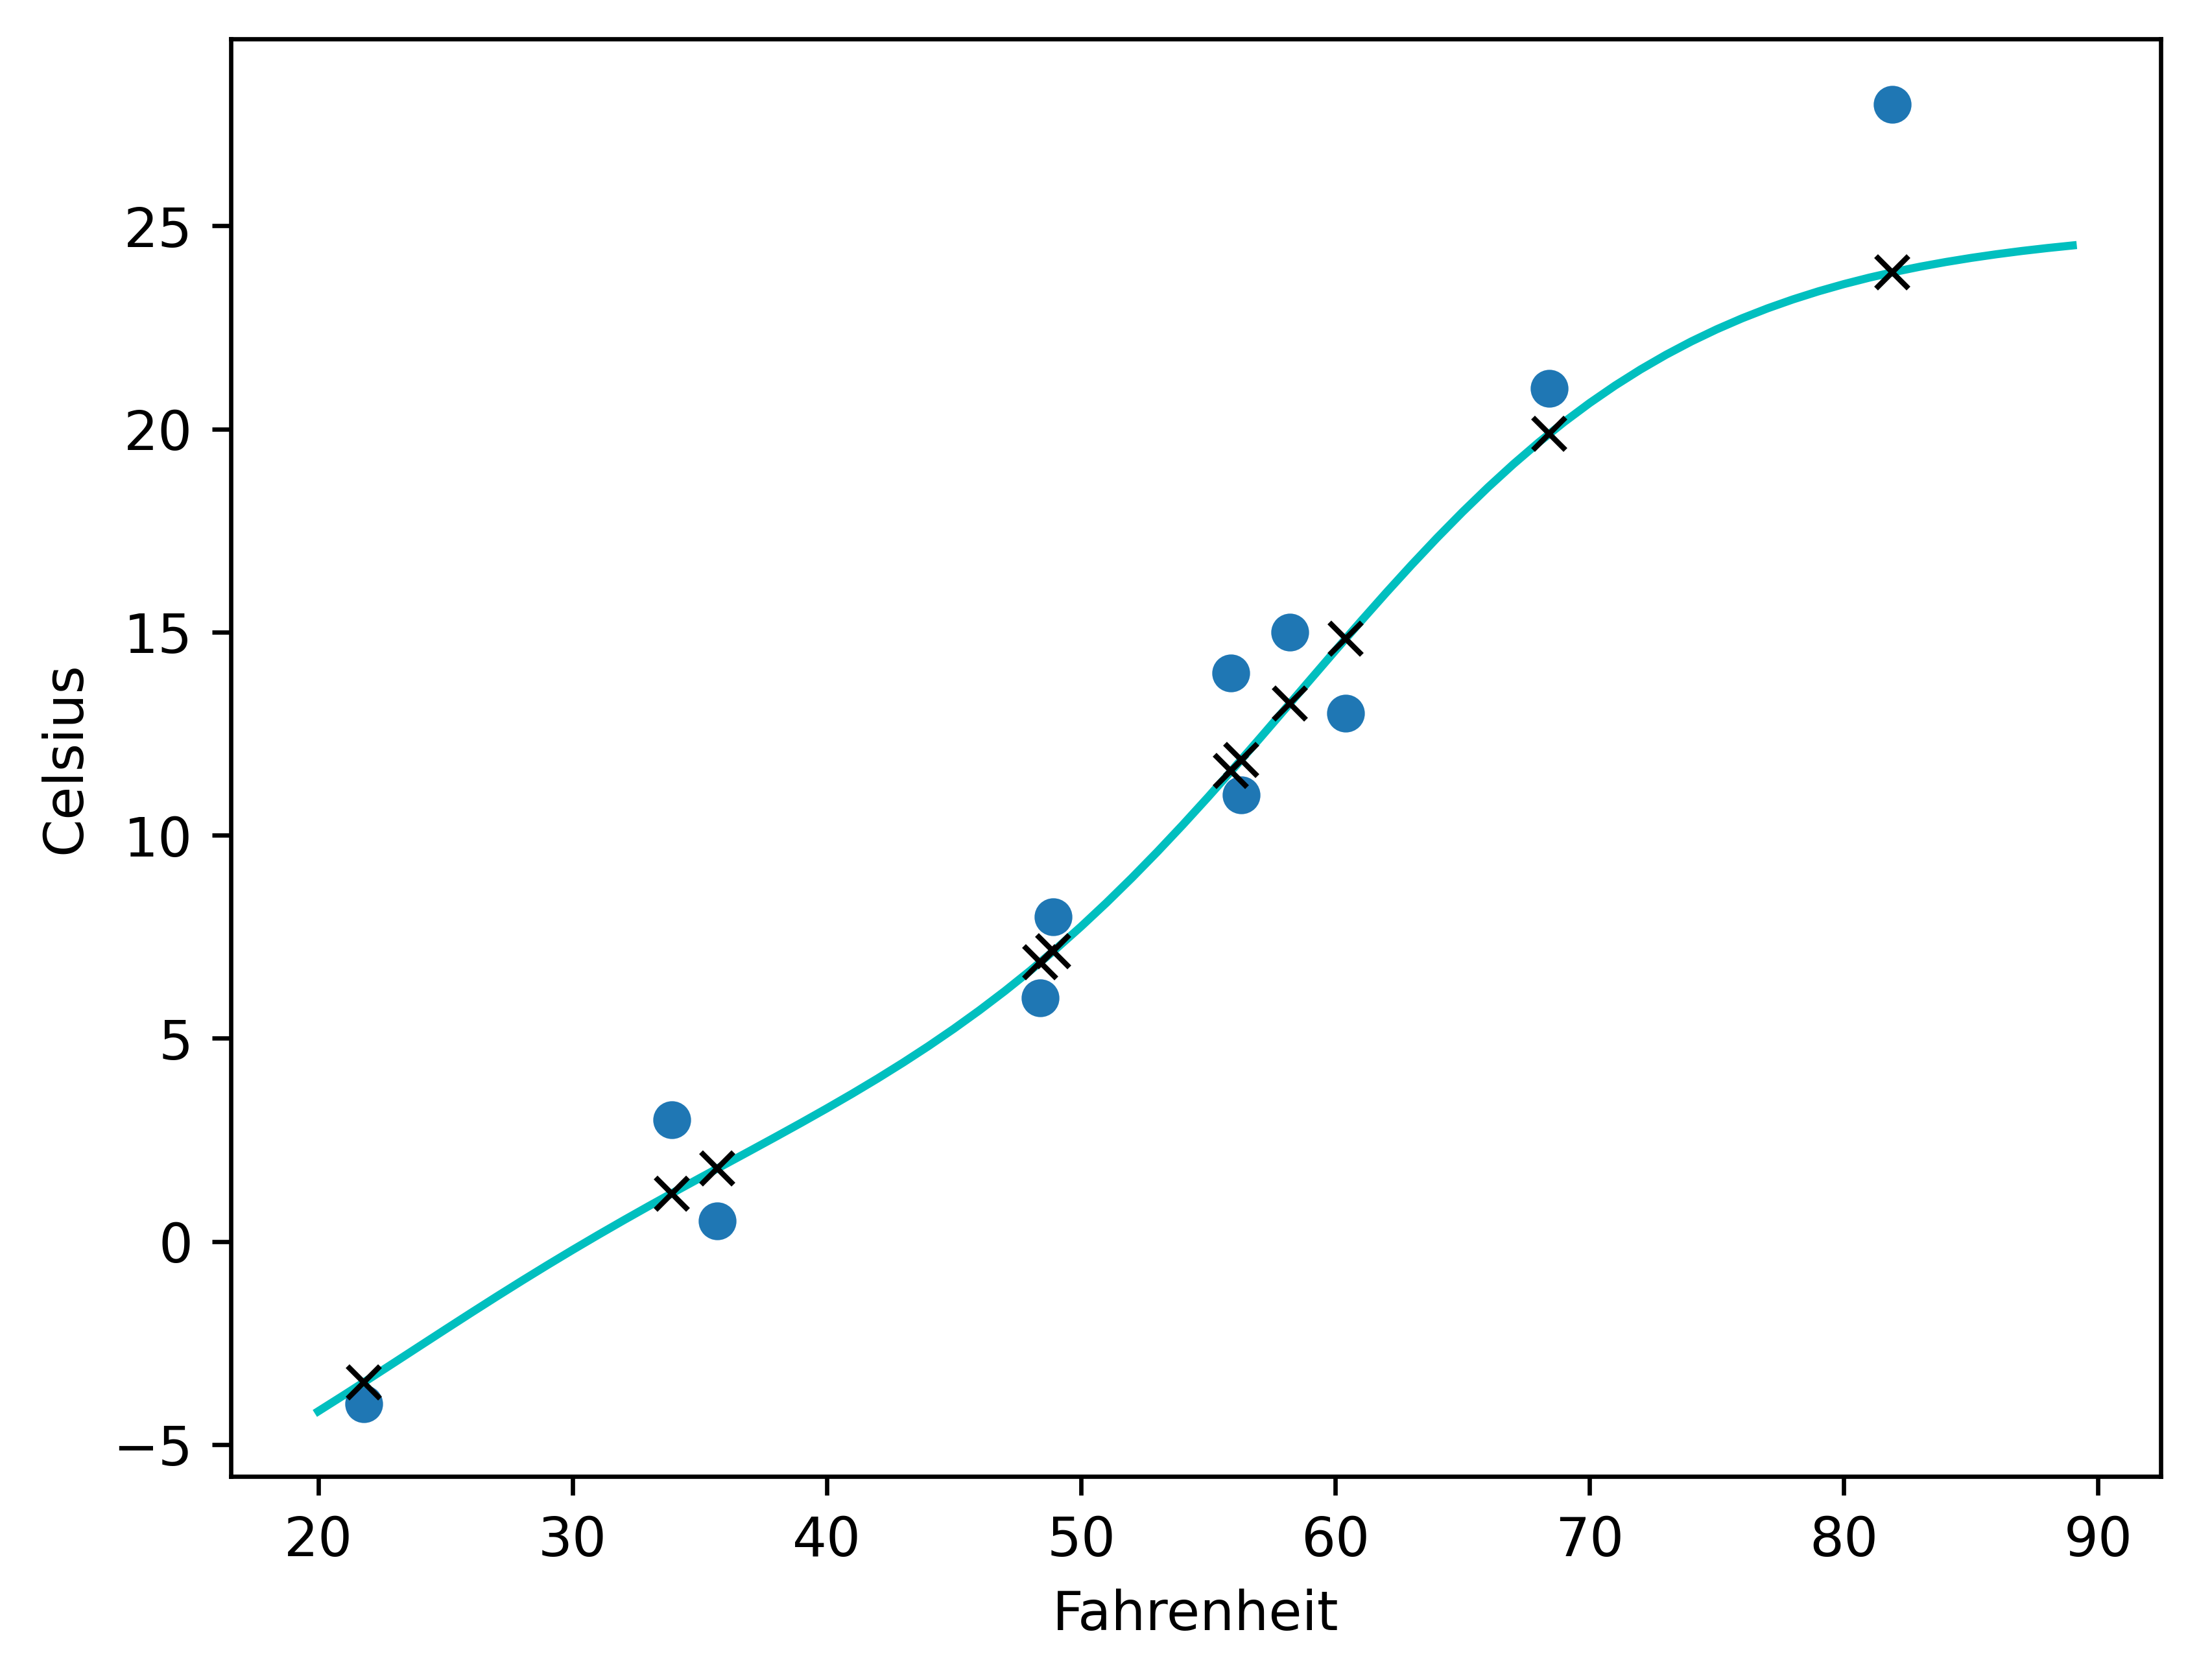

In [155]:
from matplotlib import pyplot as plt
t_range = torch.arange(20.,90.).unsqueeze(1)
print(t_range.shape)
fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seqModel2(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seqModel2(0.1 * t_u.unsqueeze(1)).detach().numpy(), 'kx')